## OBJECTIVE

#### `Predict behaviour to retain customers. Analyse all relevant customer data and develop focused customer retention programs` 

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
cc=pd.read_csv(r'D:\GITHUB-KAGGLE\KAGGLE\telephone churn\WA_Fn-UseC_-Telco-Customer-Churn.csv')
cc.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Data Exploration

In [4]:
cc.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#### No null values are present in the dataset

In [5]:
cc.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
cc.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


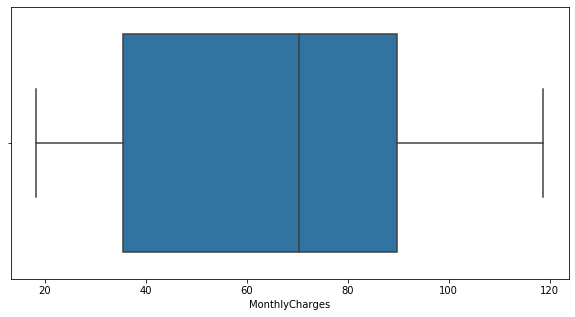

In [7]:
plt.figure(figsize=(10,5))
sns.boxplot(cc['MonthlyCharges'])
plt.show()

#### There is no significant Outliers in the dataset

### Finding the Percentage of customers who churned over last year

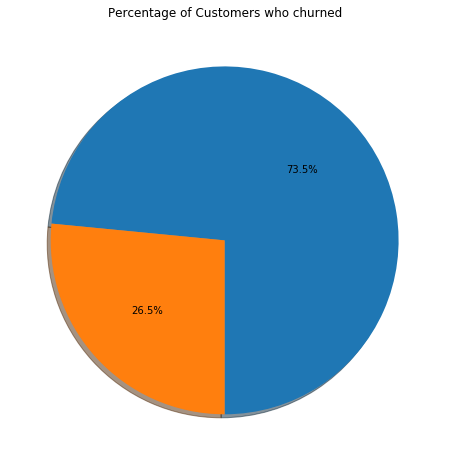

In [8]:
plt.figure(figsize=(10,8))
sizes = cc['Churn'].value_counts(sort = True)
plt.pie(sizes,autopct='%1.1f%%', shadow=True, startangle=270,)
plt.title('Percentage of Customers who churned')
plt.show()

#### 26.5% of customers churned in the given dataset

### Dropping Irrelevant data

In [9]:
cc.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [10]:
cc.drop(['customerID','PaperlessBilling','OnlineSecurity','OnlineBackup','DeviceProtection'], axis=1, inplace= True)
cc.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,No,No,Month-to-month,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,No,No,No,One year,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,No,No,No,Month-to-month,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,No,One year,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,Month-to-month,Electronic check,70.70,151.65,Yes


### Converting Numerical data from object type data

In [11]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gender           7043 non-null   object 
 1   SeniorCitizen    7043 non-null   int64  
 2   Partner          7043 non-null   object 
 3   Dependents       7043 non-null   object 
 4   tenure           7043 non-null   int64  
 5   PhoneService     7043 non-null   object 
 6   MultipleLines    7043 non-null   object 
 7   InternetService  7043 non-null   object 
 8   TechSupport      7043 non-null   object 
 9   StreamingTV      7043 non-null   object 
 10  StreamingMovies  7043 non-null   object 
 11  Contract         7043 non-null   object 
 12  PaymentMethod    7043 non-null   object 
 13  MonthlyCharges   7043 non-null   float64
 14  TotalCharges     7043 non-null   object 
 15  Churn            7043 non-null   object 
dtypes: float64(1), int64(2), object(13)
memory usage: 880.5+ KB


In [12]:
cc.shape

(7043, 16)

#### It is found that 'Total charges, is an object which shall be converted to a numerical data type

In [13]:
cc['TotalCharges'].head(20)

0       29.85
1      1889.5
2      108.15
3     1840.75
4      151.65
5       820.5
6      1949.4
7       301.9
8     3046.05
9     3487.95
10     587.45
11      326.8
12     5681.1
13     5036.3
14    2686.05
15    7895.15
16    1022.95
17    7382.25
18     528.35
19     1862.9
Name: TotalCharges, dtype: object

In [14]:
cc['TotalCharges']=pd.to_numeric(cc['TotalCharges'], errors='coerce').fillna(0, downcast='infer')
cc.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gender           7043 non-null   object 
 1   SeniorCitizen    7043 non-null   int64  
 2   Partner          7043 non-null   object 
 3   Dependents       7043 non-null   object 
 4   tenure           7043 non-null   int64  
 5   PhoneService     7043 non-null   object 
 6   MultipleLines    7043 non-null   object 
 7   InternetService  7043 non-null   object 
 8   TechSupport      7043 non-null   object 
 9   StreamingTV      7043 non-null   object 
 10  StreamingMovies  7043 non-null   object 
 11  Contract         7043 non-null   object 
 12  PaymentMethod    7043 non-null   object 
 13  MonthlyCharges   7043 non-null   float64
 14  TotalCharges     7043 non-null   float64
 15  Churn            7043 non-null   object 
dtypes: float64(2), int64(2), object(12)
memory usage: 880.5+ KB


### Data Visualization

### Bivariate Analysis

#### Customer churn and Gender

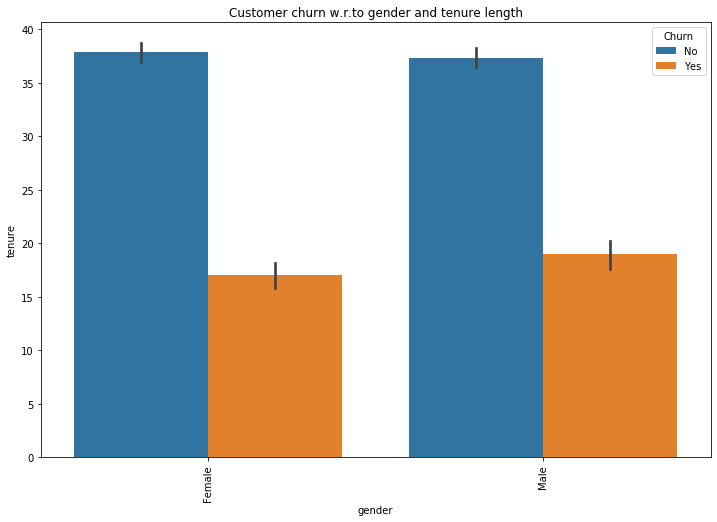

In [42]:
plt.figure(figsize=(12,8))
sns.barplot(data =cc, x='gender',y='tenure',hue='Churn')
plt.title('Customer churn w.r.to gender and tenure length')
plt.xticks(rotation=90)
plt.show()

#### From the above graph we can infer that,
a) `The customer churn is not gender based`

b) `The more the tenure period, the less likely the customer is to churn`

#### Customer churn and Senior citizen status

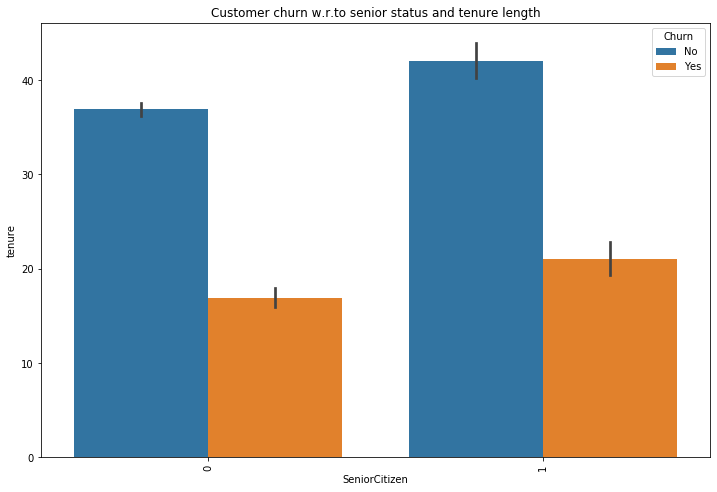

In [16]:
plt.figure(figsize=(12,8))
sns.barplot(data =cc, x='SeniorCitizen',y='tenure',hue='Churn')
plt.title('Customer churn w.r.to senior status and tenure length')
plt.xticks(rotation=90)
plt.show()

#### From the above graph we can infer that,
 `The customer churn is similar regardless of being a senior citizen or not`


#### Customer churn and Charges paid

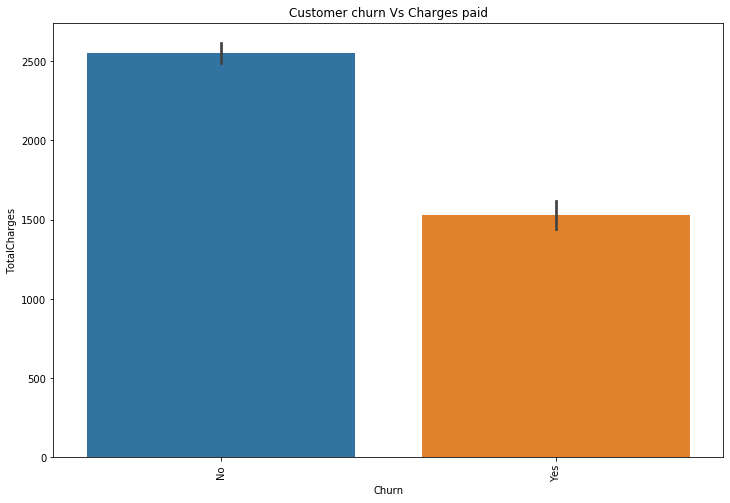

In [17]:
plt.figure(figsize=(12,8))
sns.barplot(data =cc, x='Churn',y='TotalCharges')
plt.title('Customer churn Vs Charges paid')
plt.xticks(rotation=90)
plt.show()

#### From the above graph we can infer that,
 `The more Charge the customer is paying, the less likely he is to churn`

#### Converting the churn variable(categorical) to a numerical variable

In [18]:
cc.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,No,No,Month-to-month,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,No,No,No,One year,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,No,No,No,Month-to-month,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,No,One year,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,Month-to-month,Electronic check,70.70,151.65,Yes


In [19]:
cc['ChurnNo']=cc['Churn'].map(dict(Yes=0, No=1))
cc.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,ChurnNo
0,Female,0,Yes,No,1,No,No phone service,DSL,No,No,No,Month-to-month,Electronic check,29.85,29.85,No,1
1,Male,0,No,No,34,Yes,No,DSL,No,No,No,One year,Mailed check,56.95,1889.50,No,1
2,Male,0,No,No,2,Yes,No,DSL,No,No,No,Month-to-month,Mailed check,53.85,108.15,Yes,0
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,No,One year,Bank transfer (automatic),42.30,1840.75,No,1
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,Month-to-month,Electronic check,70.70,151.65,Yes,0


#### A new column 'ChurnNo' is created from Churn as a numeric variable for easier visualisation

### Assessing service provided and likelihood of churning

#### Customer churn w.r.to Phone service provided

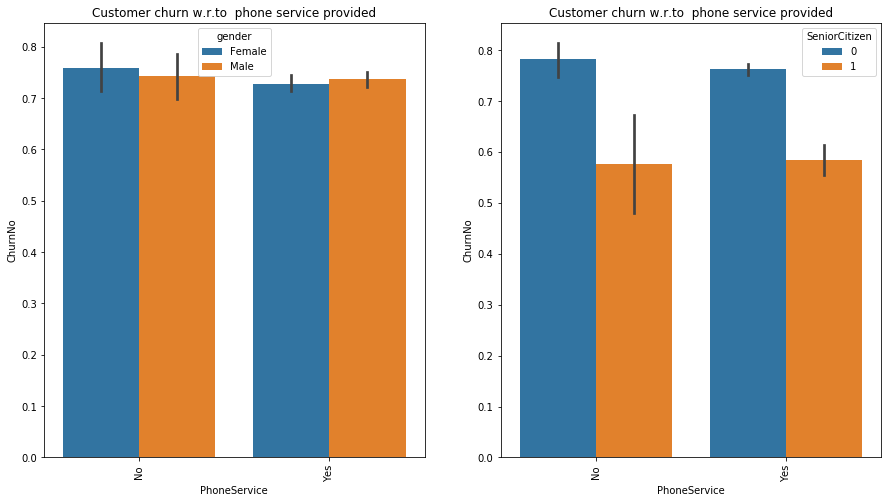

In [20]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.barplot(data =cc, x='PhoneService',y='ChurnNo',hue='gender')
plt.title('Customer churn w.r.to  phone service provided')
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.barplot(data =cc, x='PhoneService',y='ChurnNo',hue='SeniorCitizen')
plt.title('Customer churn w.r.to  phone service provided')
plt.xticks(rotation=90)
plt.show()

#### From the above graph we can infer that,
 `The phone service provided doesn't have a significant impact on gender nor Senior citizens`
 


#### Customer churn w.r.to Internet service provided

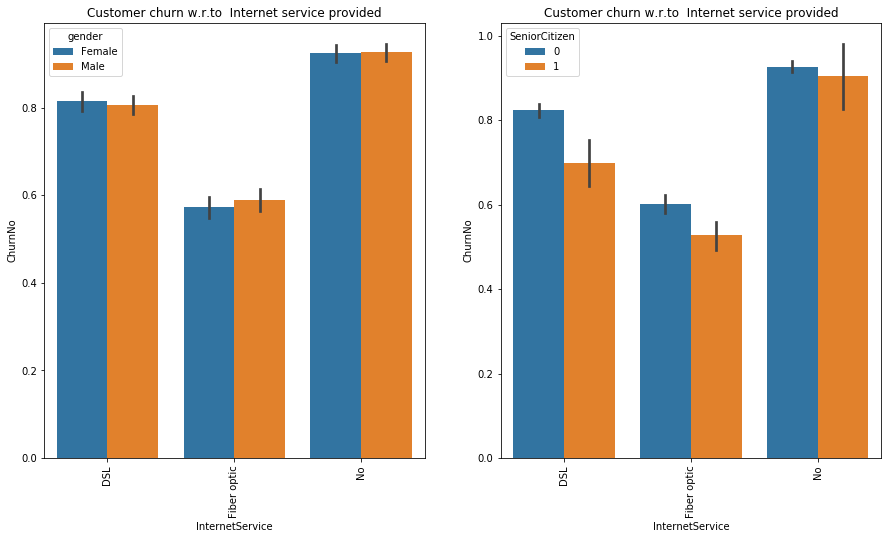

In [21]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.barplot(data =cc, x='InternetService',y='ChurnNo',hue='gender')
plt.title('Customer churn w.r.to  Internet service provided')
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.barplot(data =cc, x='InternetService',y='ChurnNo',hue='SeniorCitizen')
plt.title('Customer churn w.r.to  Internet service provided')
plt.xticks(rotation=90)
plt.show()

#### From the above graph we can infer that,
 a) Among senior citizens less people churn who are using a DSL Internet service

#### Customer churn w.r.to TechSupport provided

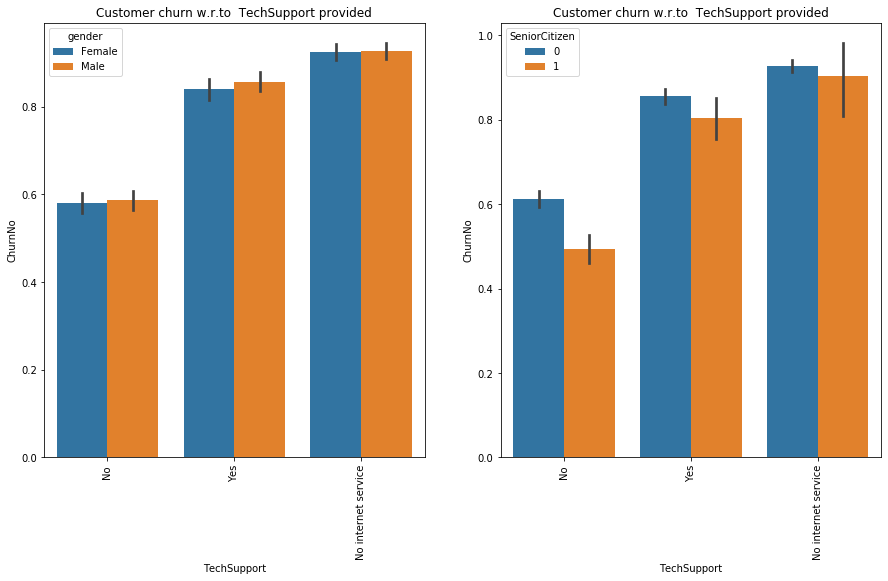

In [22]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.barplot(data =cc, x='TechSupport',y='ChurnNo',hue='gender')
plt.title('Customer churn w.r.to  TechSupport provided')
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.barplot(data =cc, x='TechSupport',y='ChurnNo',hue='SeniorCitizen')
plt.title('Customer churn w.r.to  TechSupport provided')
plt.xticks(rotation=90)
plt.show()

#### Customer churn w.r.to Streaming Movies service provided

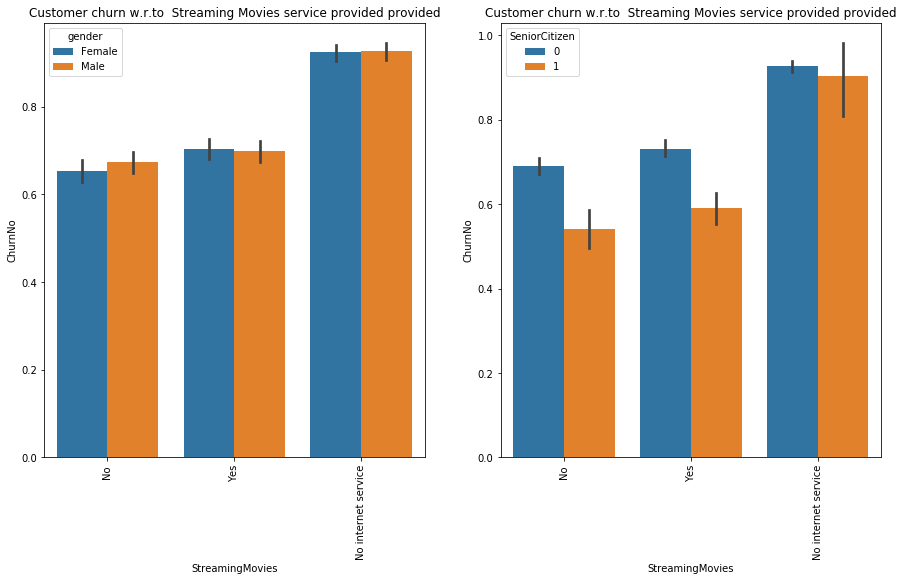

In [23]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.barplot(data =cc, x='StreamingMovies',y='ChurnNo',hue='gender')
plt.title('Customer churn w.r.to  Streaming Movies service provided provided')
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.barplot(data =cc, x='StreamingMovies',y='ChurnNo',hue='SeniorCitizen')
plt.title('Customer churn w.r.to  Streaming Movies service provided provided')
plt.xticks(rotation=90)
plt.show()

### Correlation Matrix

In [24]:
cc1=cc.corr()
cc1

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,ChurnNo
SeniorCitizen,1.000000,0.016567,0.220173,0.103006,-0.150889
tenure,0.016567,1.000000,0.247900,0.826178,0.352229
MonthlyCharges,0.220173,0.247900,1.000000,0.651174,-0.193356
TotalCharges,0.103006,0.826178,0.651174,1.000000,0.198324
ChurnNo,-0.150889,0.352229,-0.193356,0.198324,1.000000


In [25]:
cor1=cc1.unstack()
cor1.sort_values(ascending=False).drop_duplicates().head(11)

ChurnNo         ChurnNo           1.000000
TotalCharges    tenure            0.826178
                MonthlyCharges    0.651174
tenure          ChurnNo           0.352229
                MonthlyCharges    0.247900
SeniorCitizen   MonthlyCharges    0.220173
TotalCharges    ChurnNo           0.198324
SeniorCitizen   TotalCharges      0.103006
tenure          SeniorCitizen     0.016567
SeniorCitizen   ChurnNo          -0.150889
MonthlyCharges  ChurnNo          -0.193356
dtype: float64

Text(0.5, 1, 'Plot-1')

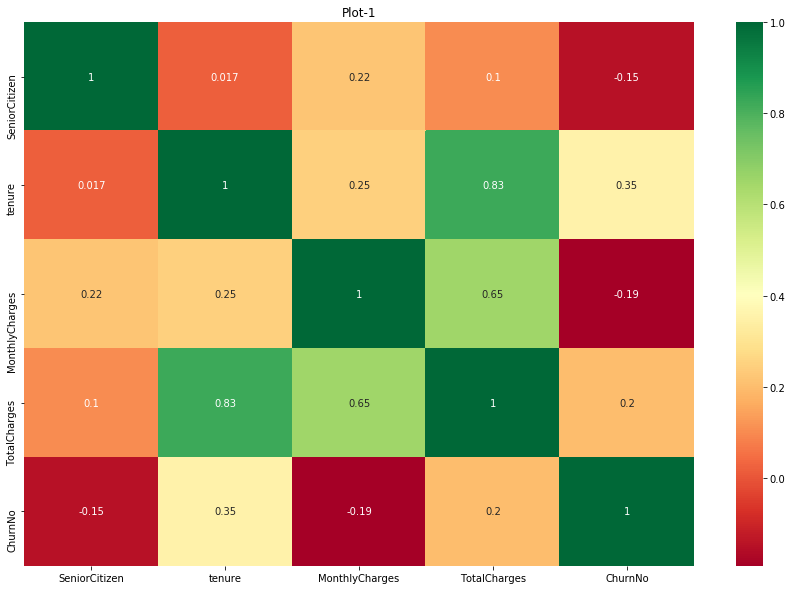

In [26]:
plt.figure(figsize=[15,10])
ax=sns.heatmap(cc1,cmap="RdYlGn",annot= True)
plt.title('Plot-1')

In [27]:
cc.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,ChurnNo
0,Female,0,Yes,No,1,No,No phone service,DSL,No,No,No,Month-to-month,Electronic check,29.85,29.85,No,1
1,Male,0,No,No,34,Yes,No,DSL,No,No,No,One year,Mailed check,56.95,1889.50,No,1
2,Male,0,No,No,2,Yes,No,DSL,No,No,No,Month-to-month,Mailed check,53.85,108.15,Yes,0
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,No,One year,Bank transfer (automatic),42.30,1840.75,No,1
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,Month-to-month,Electronic check,70.70,151.65,Yes,0


In [28]:
cc['PhoneService']=cc['PhoneService'].map(dict(Yes=1, No=0))
cc['TechSupport']=cc['TechSupport'].map(dict(Yes=1, No=0))
cc['StreamingTV']=cc['StreamingTV'].map(dict(Yes=1, No=0))
cc['StreamingMovies']=cc['StreamingMovies'].map(dict(Yes=0, No=1))
cc.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,ChurnNo
0,Female,0,Yes,No,1,0,No phone service,DSL,0.0,0.0,1.0,Month-to-month,Electronic check,29.85,29.85,No,1
1,Male,0,No,No,34,1,No,DSL,0.0,0.0,1.0,One year,Mailed check,56.95,1889.50,No,1
2,Male,0,No,No,2,1,No,DSL,0.0,0.0,1.0,Month-to-month,Mailed check,53.85,108.15,Yes,0
3,Male,0,No,No,45,0,No phone service,DSL,1.0,0.0,1.0,One year,Bank transfer (automatic),42.30,1840.75,No,1
4,Female,0,No,No,2,1,No,Fiber optic,0.0,0.0,1.0,Month-to-month,Electronic check,70.70,151.65,Yes,0


Text(0.5, 1, 'Plot-1')

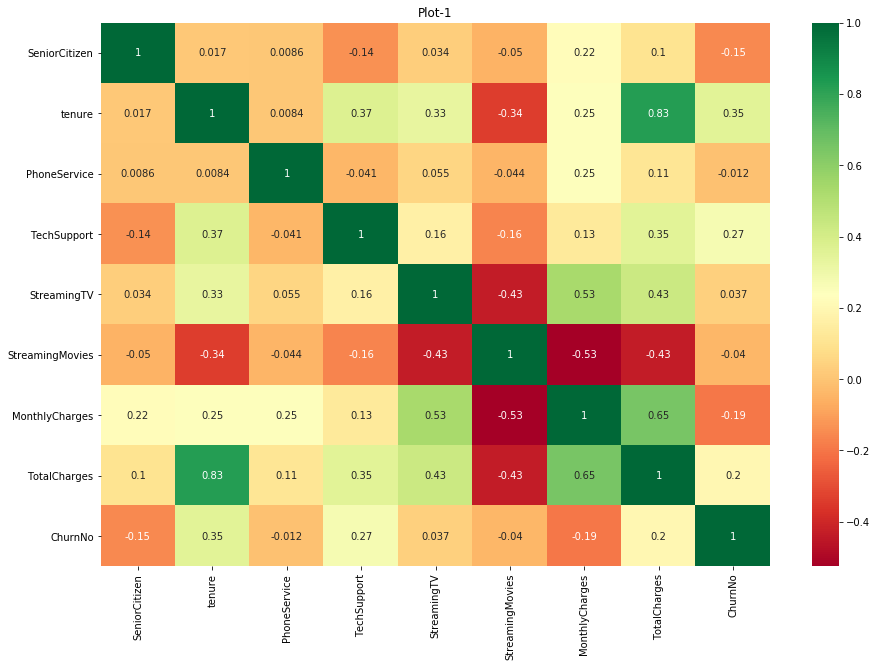

In [31]:
plt.figure(figsize=[15,10])
ax=sns.heatmap(cc2,cmap="RdYlGn",annot= True)
plt.title('Plot-1')